In [84]:
# loading the libraries 
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder  

In [85]:
# loading the dataset
dataset = pd.read_csv('train.csv')
dataset.info()   # looking into the information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [86]:
# Checking the first 5 columns of the dataset
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [87]:
# getting basic statistic
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [88]:
# Check for missing values before replacement
print("Missing values before replacement:")
dataset.isnull().sum()

Missing values before replacement:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

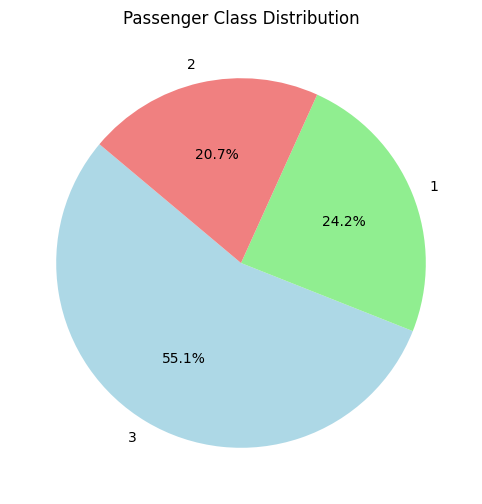

In [89]:
# Pie Chart: Survival Distribution by Passenger Class
class_counts = dataset['Pclass'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Passenger Class Distribution')
plt.show()


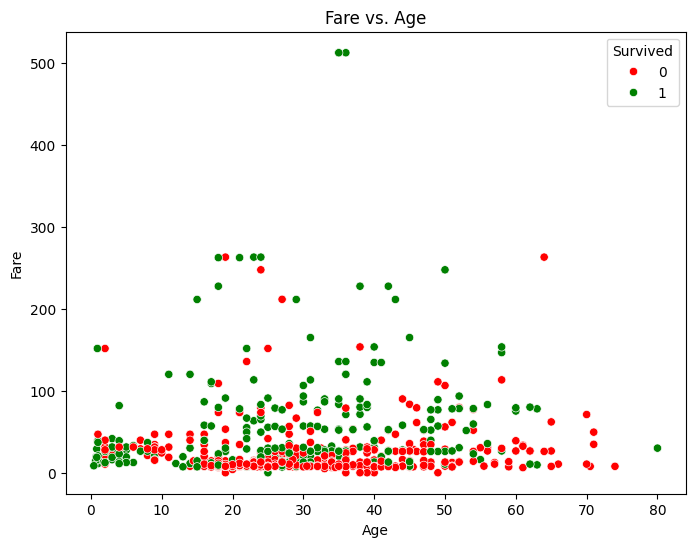

<Figure size 640x480 with 0 Axes>

In [90]:
# Scatter Plot: Fare vs. Age
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=dataset, palette={0: 'red', 1: 'green'})
plt.title('Fare vs. Age')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived')
plt.show()
plt.tight_layout()

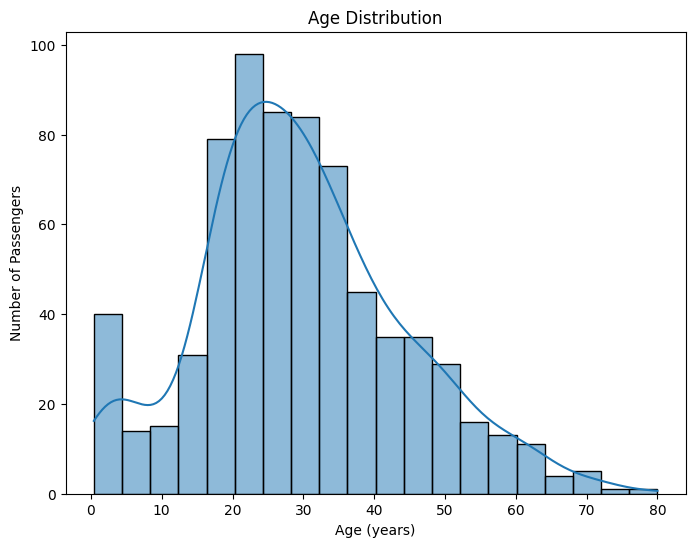

<Figure size 640x480 with 0 Axes>

In [91]:
# Line Chart: Age Distribution
plt.figure(figsize=(8, 6))
sns.histplot(dataset['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.xlabel('Age (years)')
plt.ylabel('Number of Passengers')
plt.show()
plt.tight_layout()

C:\Users\david\AppData\Local\Temp\ipykernel_7136\286366718.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="Pclass", y="Age", data=dataset, marker="o", ci=None, linestyle='-', palette='tab10')
C:\Users\david\AppData\Local\Temp\ipykernel_7136\286366718.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="Pclass", y="Age", data=dataset, marker="o", ci=None, linestyle='-', palette='tab10')


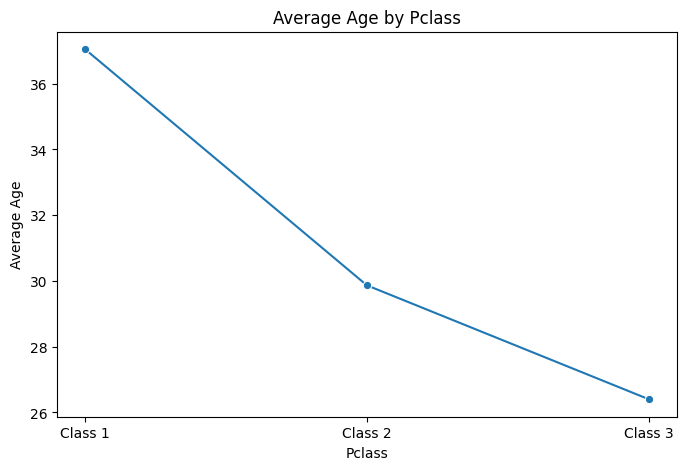

<Figure size 640x480 with 0 Axes>

In [122]:
# 4. Line Chart - Average Age by Pclass
plt.figure(figsize=(8, 5))
sns.lineplot(x="Pclass", y="Age", data=dataset, marker="o", ci=None, linestyle='-', palette='tab10')
plt.title("Average Age by Pclass")
plt.xlabel("Pclass")
plt.ylabel("Average Age")
plt.xticks([1, 2, 3], ["Class 1", "Class 2", "Class 3"])
plt.show()
plt.tight_layout()

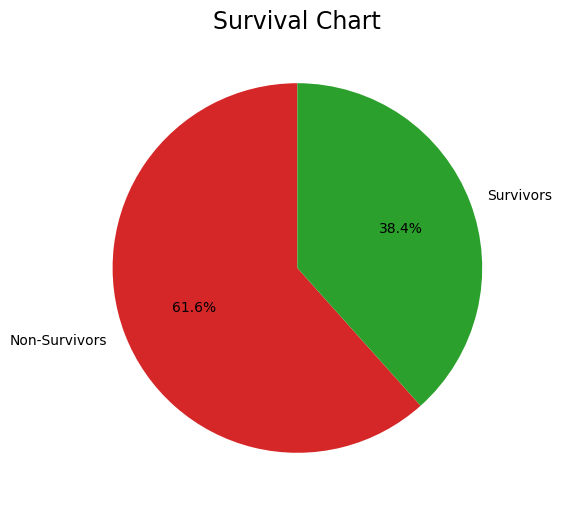

<Figure size 640x480 with 0 Axes>

In [123]:
# Pie Chart - Distribution of Survival Status
survival_counts = dataset["Survived"].value_counts()

# Define a new color palette
colors = ['#D62728', '#2CA02C']

# Define the passenger labels
passengers = ['Non-Survivors', 'Survivors'] 


plt.figure(figsize=(6, 6))
survival_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors, labels=passengers)

plt.title("Survival Chart", fontsize=17)
plt.ylabel('')
plt.show()
plt.tight_layout()

In [125]:
#replacing the NaN values
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mean())  # Fill 'Age' with mean
dataset['Fare'] = dataset['Fare'].fillna(dataset['Fare'].median())  # Fill 'Fare' with median

# Check for missing values after replacement
print("\nMissing values after replacement:")
print(dataset.isnull().sum())

# Display summary statistics after replacement
print("\nSummary statistics after replacement:")
print(dataset.describe())


Missing values after replacement:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Summary statistics after replacement:
       PassengerId    Survived      Pclass         Sex         Age  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642    0.647587   29.699118   
std     257.353842    0.486592    0.836071    0.477990   13.002015   
min       1.000000    0.000000    1.000000    0.000000    0.420000   
25%     223.500000    0.000000    2.000000    0.000000   22.000000   
50%     446.000000    0.000000    3.000000    1.000000   29.699118   
75%     668.500000    1.000000    3.000000    1.000000   35.000000   
max     891.000000    1.000000    3.000000    1.000000   80.000000   

            SibSp       Parch        Fare  
count  891

In [95]:
#checking the total number of passengers
dataset['PassengerId'].value_counts()   

PassengerId
891    1
1      1
2      1
3      1
4      1
      ..
31     1
32     1
33     1
34     1
35     1
Name: count, Length: 891, dtype: int64

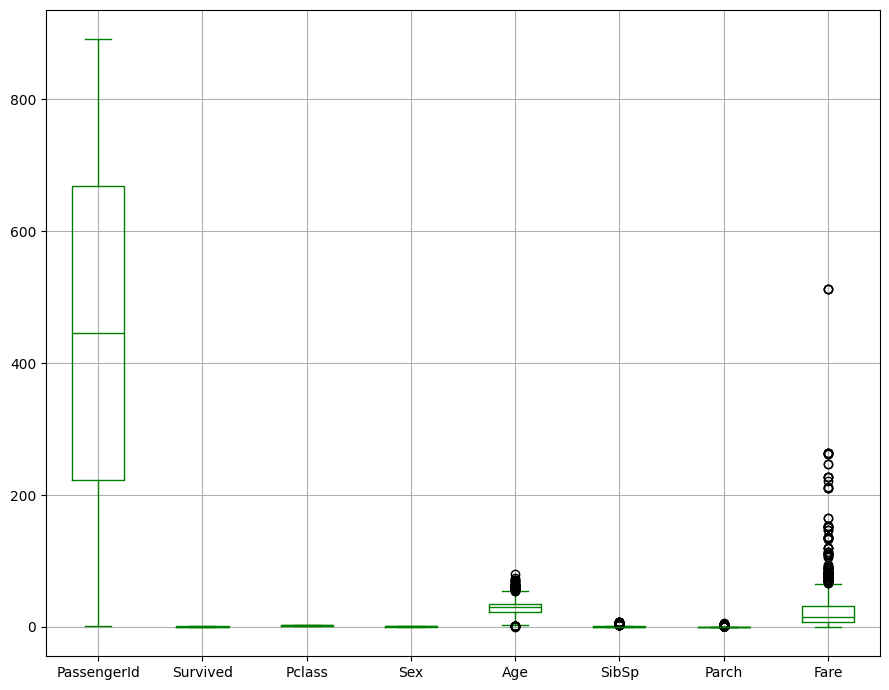

In [126]:
# using the Histogram  chart checking for any outliers
dataset.boxplot(figsize=(9,7),color='green') 
plt.tight_layout()
plt.show()

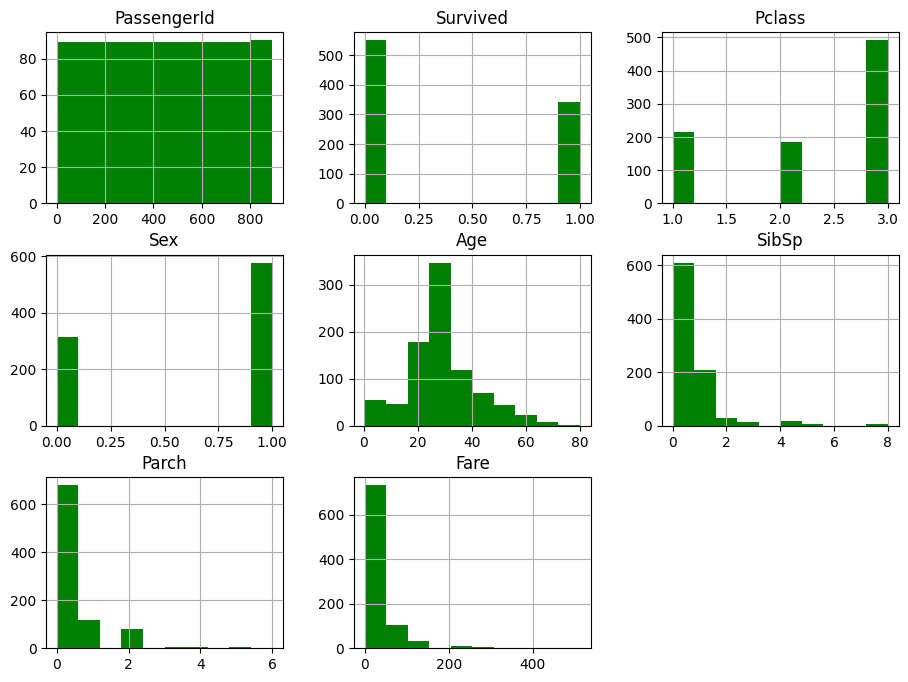

<Figure size 640x480 with 0 Axes>

In [127]:
# using the Histogram  chart checking for any outliers
dataset.hist(bins =10,figsize=(11,8),color='green')
plt.show()
plt.tight_layout()

In [128]:
#checking for number of survivors 
dataset['Survived'].value_counts()     

Survived
0    549
1    342
Name: count, dtype: int64

In [99]:
"""The output of the code dataset['Survived'].value_counts() is providing a count of 
    how many passengers survived (1) and how many did not survive (0) in the dataset.

    0 (Did Not Survive): There were 549 passengers who did not survive.
    1 (Survived): There were 342 passengers who survived.

An overview of the survival distribution in your dataset, showing that the majority 
of the passengers did not survive, out of 549, while 342 passengers did survive   
"""

"The output of the code dataset['Survived'].value_counts() is providing a count of \n    how many passengers survived (1) and how many did not survive (0) in the dataset.\n\n    0 (Did Not Survive): There were 549 passengers who did not survive.\n    1 (Survived): There were 342 passengers who survived.\n\nAn overview of the survival distribution in your dataset, showing that the majority \nof the passengers did not survive, out of 549, while 342 passengers did survive   \n"

In [100]:
dataset.groupby("Age")["Survived"].value_counts()

Age    Survived
0.42   1           1
0.67   1           1
0.75   1           2
0.83   1           2
0.92   1           1
                  ..
70.00  0           2
70.50  0           1
71.00  0           2
74.00  0           1
80.00  1           1
Name: count, Length: 144, dtype: int64

In [101]:
#checking for age survival rate
age_survival_rate = dataset.groupby("Age")["Survived"].mean()
age_survival_rate

Age
0.42     1.0
0.67     1.0
0.75     1.0
0.83     1.0
0.92     1.0
        ... 
70.00    0.0
70.50    0.0
71.00    0.0
74.00    0.0
80.00    1.0
Name: Survived, Length: 89, dtype: float64

In [129]:
""" The code above provides the proportion of survivors for each age, instead of just the raw count. For example:

    If the survival rate for age 2.0 is 1.0, this means that all passengers of age 2 survived.
    If the survival rate for age 29.7 is 0.33, this means that about 33% of passengers of age 29.7 survived.

This kind of analysis allows visualize patterns such as the correlation between younger passengers
and higher survival rates. 

The dataset has a variety of passengers across different age groups, and survival is recorded for each of those age groups. 
The counts of survivors assist to understand how age may influence the likelihood of survival. 
However, with a more complete dataset and further calculations, would be able to see clearer survival trends across age categories.     
"""

' The code above provides the proportion of survivors for each age, instead of just the raw count. For example:\n\n    If the survival rate for age 2.0 is 1.0, this means that all passengers of age 2 survived.\n    If the survival rate for age 29.7 is 0.33, this means that about 33% of passengers of age 29.7 survived.\n\nThis kind of analysis allows visualize patterns such as the correlation between younger passengers\nand higher survival rates. \n\nThe dataset has a variety of passengers across different age groups, and survival is recorded for each of those age groups. \nThe counts of survivors assist to understand how age may influence the likelihood of survival. \nHowever, with a more complete dataset and further calculations, would be able to see clearer survival trends across age categories.     \n'

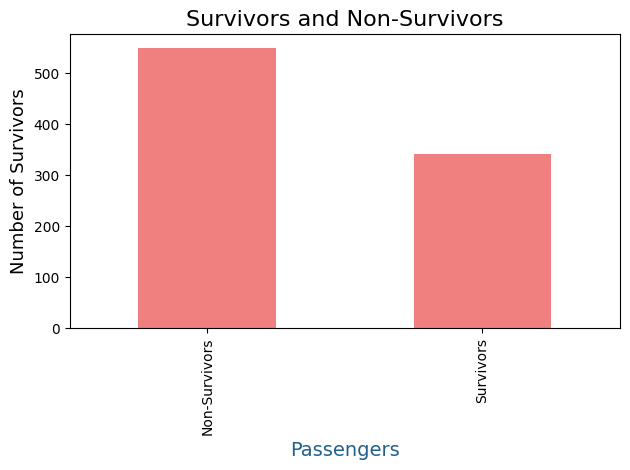

In [130]:
# Creating the DataFrame for the Survived and Non Survived passengers
plotdata = pd.DataFrame({"": [549, 342]},
    index=["Non-Survivors", "Survivors"])

# Define colors for the bars
colors = ["lightcoral"]

# Plot a bar chart with different colors for each bar
plotdata.plot(kind="bar", color=colors, legend=False)

# Customize the chart
plt.title('Survivors and Non-Survivors', fontsize=16)
plt.xlabel('Passengers', fontsize=14, color='#21618c')
plt.ylabel('Number of Survivors', fontsize=13)
plt.tight_layout()
plt.show()


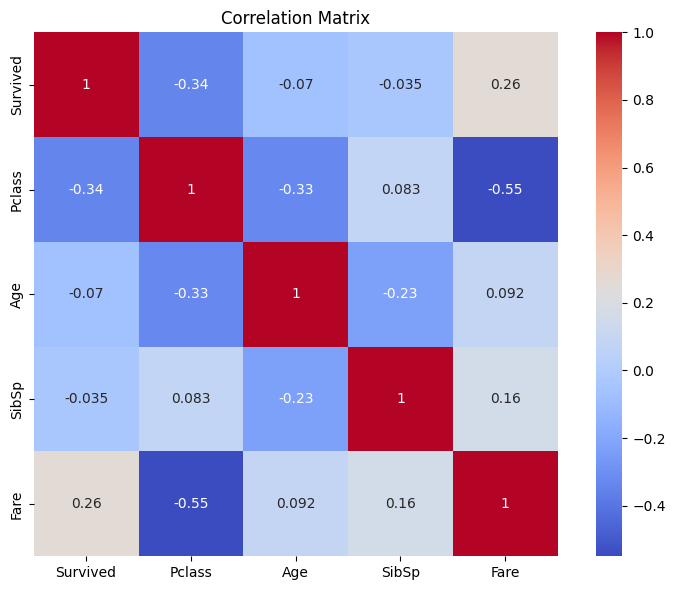

In [131]:
# starting the Correlation Matrix
# selecting the numerical columns
dataset_numerical = dataset[['Survived', 'Pclass', 'Age', 'SibSp', 'Fare']]

""" This creates a correlation matrix from the numerical columns in the DataFrame and display it as a heatmap.
The 'Survived' column is a binary column (0 or 1), so it's not strictly numerical, but it can still be correlated with other columns.
The 'Age' column contained missing values (NaN), so this was handled before creating the correlation matrix. """

# Replace missing values with the mean of the column
dataset_numerical.loc[:, 'Age'] = dataset_numerical['Age'].fillna(dataset_numerical['Age'].mean())

# Calculate the correlation matrix
corr_matrix = dataset_numerical.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [105]:
# Initialize LabelEncoder, # A module use to convert categorical labels into numeric labels.
label_encoder = LabelEncoder()

# Fit and transform the 'Sex' column
dataset['Sex'] = label_encoder.fit_transform(dataset['Sex'])

# printing the dataset
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C148,C


In [132]:
""" Another approach was also to Convert 'Sex' column to numerical values
dataset['Sex'] = dataset['Sex'].map({'female': 0, 'male': 1}) """

" Another approach was also to Convert 'Sex' column to numerical values\ndataset['Sex'] = dataset['Sex'].map({'female': 0, 'male': 1}) "

In [ ]:
# building the model with the below Columns
X = dataset[['PassengerId','Pclass','Age','Sex', 'SibSp', 'Fare', ]] # independent values
y = dataset['Survived'] # dependent value (this will be our outcome

In [ ]:
# Printing the X model
X

,PassengerId,Pclass,Age,Sex,SibSp,Fare
0,1,3,22.000000,1,1,7.2500
1,2,1,38.000000,0,1,71.2833
2,3,3,26.000000,0,0,7.9250
3,4,1,35.000000,0,1,53.1000
4,5,3,35.000000,1,0,8.0500
...,...,...,...,...,...,...
886,887,2,27.000000,1,0,13.0000
887,888,1,19.000000,0,0,30.0000
888,889,3,29.699118,0,1,23.4500
889,890,1,26.000000,1,0,30.0000


In [ ]:
# Printing the y model
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [110]:
# Splitting the model for training after X and y are identified
# 20% data use for testing, remaining 80% for training
X_training, X_testing, y_training, y_testing = train_test_split(X, y, test_size=0.20, random_state=30) 

In [111]:
#printing the X_training model
X_training

,PassengerId,Pclass,Age,Sex,SibSp,Fare
199,200,2,24.000000,0,0,13.0000
703,704,3,25.000000,1,0,7.7417
823,824,3,27.000000,0,0,12.4750
236,237,2,44.000000,1,1,26.0000
679,680,1,36.000000,1,0,512.3292
...,...,...,...,...,...,...
140,141,3,29.699118,0,0,15.2458
500,501,3,17.000000,1,0,8.6625
813,814,3,6.000000,0,4,31.2750
421,422,3,21.000000,1,0,7.7333


In [112]:
#printing the y_training model
y_training

199    0
703    0
823    1
236    0
679    1
      ..
140    0
500    0
813    0
421    0
805    0
Name: Survived, Length: 712, dtype: int64

In [113]:
# Scaling the data using standard scaling 
# Logistic Regression will be used since we have a binary classification ie just 2 results 

standard_scaler = StandardScaler()
X_training = standard_scaler.fit_transform(X_training)
X_testing = standard_scaler.transform(X_testing)

In [114]:
# printing our X_training  AND X_testing models
# this output means this has been scaled to mean of zero and standard deviation of 1
X_training

array([[-0.93474027, -0.37787841, -0.40883315, -1.36361202, -0.47671932,
        -0.37708475],
       [ 1.0215856 ,  0.82323512, -0.33229277,  0.73334642, -0.47671932,
        -0.477489  ],
       [ 1.48737747,  0.82323512, -0.179212  , -1.36361202, -0.47671932,
        -0.38710932],
       ...,
       [ 1.44856148,  0.82323512, -1.78656007, -1.36361202,  3.23283433,
        -0.02813399],
       [-0.07302531,  0.82323512, -0.6384543 ,  0.73334642, -0.47671932,
        -0.47764939],
       [ 1.41750869,  0.82323512,  0.12694954,  0.73334642, -0.47671932,
        -0.47685315]], shape=(712, 6))

In [115]:
X_testing

array([[-0.0885517 , -0.37787841, -0.86807546, -1.36361202, -0.47671932,
        -0.37708475],
       [-0.51552759, -1.57899194, -0.94461584, -1.36361202,  0.45066909,
         1.45407132],
       [-1.36947936,  0.82323512,  0.0273795 ,  0.73334642, -0.47671932,
        -0.47160219],
       ...,
       [ 0.23750261,  0.82323512, -0.6384543 , -1.36361202, -0.47671932,
        -0.47733052],
       [ 0.31125299, -1.57899194,  0.05040915, -1.36361202, -0.47671932,
         1.16001706],
       [-1.55191451,  0.82323512,  0.815813  , -1.36361202,  0.45066909,
        -0.44439262]], shape=(179, 6))

In [116]:
logistic_r_model = LogisticRegression()
logistic_r_model.fit(X_training, y_training)

LogisticRegression()

In [117]:
# Making predictions
y_pred_log = logistic_r_model.predict(X_testing)
y_pred_log

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0])

In [118]:
# Putting testing results in a data frame
pd.DataFrame({'Actual_Survivors': y_testing, 'Predicted_Survivors': y_pred_log}) # remember  to put in a dictionary 

,Actual_Survivors,Predicted_Survivors
417,1,1
307,1,1
87,0,0
577,1,1
684,0,0
...,...,...
368,1,1
851,0,0
501,0,1
520,1,1


In [119]:
# Finding the accuracy score, giving about 77% accuracy
metrics.accuracy_score(y_testing, y_pred_log)  

0.776536312849162